In [1]:
from utils.EDA.analysis import *

In [2]:
from patsy import dmatrix
from statsmodels.graphics import utils

In [3]:
df_train = pd.read_csv("../data/train_no_missing.csv")

In [40]:
# report 확인
def LinearRegR(data, formula):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    print(result.summary())
    return result
    

# 예측치와 추정치 결과 확인 (위치도 출력)
# plot_leverage_resid2, influence_plot 확인
def LinearReg(data, formula):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    
    predict = result.predict(data).values

    y = formula.split("~")[0].strip()
    target = data[y].values
    plt.scatter(target, predict)
    
    
def LinearRegO(data, formula, num_param):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    
    predict = result.predict(data).values

    y = formula.split("~")[0].strip()
    target = data[y].values

#     ax = plt.subplot()
#     plt.scatter(target, predict)
#     cook_d2, pvals = result.get_influence().cooks_distance
#     fox_cr = 4 / (len(y) - num_param)
#     idx = np.where(cook_d2 > fox_cr)[0]
#     plt.scatter(target[idx], predict[idx], s=300, c="r", alpha=0.5)
#     utils.annotate_axes(range(len(idx)), idx, 
#                     list(zip(target[idx], predict[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
    
    
    sm.graphics.influence_plot(result)
    
def LinearRegExo(data, formula, column):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    
    fig = sm.graphics.plot_regress_exog(result, column)
    fig.set_size_inches(10, 10)
# 그래프 보기( 잔차 ) / 컬럼 값이 입력
# plot_regress_exog(fitting plit, residal-x, partial, CCPR)

In [20]:
def makeFormula(target, numeric=None, categoric=None, noInter = False):
    formula = ""
    formula += target
    formula += "~"
    
    if(numeric != None):
        formula_numeric = "+".join(numeric)
        formula += formula_numeric 
    
    if(numeric != None and categoric != None):
        formula += "+"
    
    if(categoric != None):
        categoric = list(map(lambda c :  "C(" + c + ")", categoric))
        formula_categoric = "+".join(categoric)
        formula += formula_categoric
        formula += "+0"
    
    if(noInter == True):
        formula +="+0"
    
    return formula
    

In [28]:
def makeScaleFormula(target, scale=None, non_scale=None, noInter = False):
    formula = ""
    formula += target
    formula += "~"
    
    if(scale != None):
        scale = list(map(lambda c :  "scale(" + c + ")", scale))
        formula_scale = "+".join(scale)
        formula += formula_scale 
    
    if(scale != None and non_scale != None):
        formula += "+"
    
    if(non_scale != None):
        formula_non_scale = "+".join(non_scale)
        formula += formula_non_scale
    
    if(noInter == True):
        formula +="+0"
    
    return formula

In [6]:
# 전처리
# numeric -> categorical
nuTocaList = ["MSSubClass", "MoSold", "YrSold", "OverallQual", "OverallCond"]
df_train[nuTocaList] = df_train[nuTocaList].astype("str")

### 전체 데이터를 넣어 봤을 때 결과

In [8]:
numeric_list = []
categoric_list = []

for c in df_train.columns:
    if df_train[c].dtype == "int64" or df_train[c].dtype == "float64":
        numeric_list.append(c)
    else:
        categoric_list.append(c)

df_train = pd.get_dummies(df_train)
li_column = [c for c in df_train.columns]
        
li_column.remove("log_SalePrice")
li_column.remove("Id")
li_column
result = LinearRegR(df_train, makeFormula("log_SalePrice", li_column, None, True))

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     77.03
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:00:34   Log-Likelihood:                 1456.5
No. Observations:                1460   AIC:                            -2333.
Df Residuals:                    1170   BIC:                            -800.1
Df Model:                         289                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.01

## 모든 데이터가 0.01 미만이 나오도록 돌려보기

### 전체 데이터에서 p-values가 0.01 이상의 값 제거

In [9]:
over_pvalues = list(result.pvalues[result.pvalues > 0.01].index)

In [10]:
for c in over_pvalues:
    li_column.remove(c)
    
li_column

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'SecondFlrSF',
 'log_GrLivArea',
 'BsmtFullBath',
 'WoodDeckSF',
 'ScreenPorch',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'MSZoning_all',
 'LotConfig_CulDSac',
 'LandSlope_Mod',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRNn',
 'OverallQual_1',
 'OverallQual_10',
 'OverallQual_7',
 'OverallQual_8',
 'OverallQual_9',
 'OverallCond_3',
 'OverallCond_4',
 'OverallCond_8',
 'OverallCond_9',
 'RoofMatl_ClyTile',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_TarandGrv',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkFace',
 'Foundation_Stone',
 'BsmtExposure_Gd',
 'Heating_GasW',
 'KitchenQual_Ex',
 'Functional_Maj1',
 'Functional_Maj2',


In [12]:
result1 = LinearRegR(df_train, makeFormula("log_SalePrice", li_column, None, True))

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     268.8
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:00:59   Log-Likelihood:                 1027.9
No. Observations:                1460   AIC:                            -1948.
Df Residuals:                    1406   BIC:                            -1662.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
LotArea                  0.0922 

### pvalues 높은 값 다시 제거

In [13]:
over_pvalues1 = list(result1.pvalues[result1.pvalues > 0.01].index)

for c in over_pvalues1:
    li_column.remove(c)
    
li_column

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'log_GrLivArea',
 'BsmtFullBath',
 'WoodDeckSF',
 'ScreenPorch',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'MSZoning_all',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRNn',
 'OverallQual_1',
 'OverallQual_10',
 'OverallQual_7',
 'OverallQual_8',
 'OverallQual_9',
 'OverallCond_3',
 'OverallCond_4',
 'OverallCond_8',
 'OverallCond_9',
 'RoofMatl_ClyTile',
 'Exterior1st_BrkFace',
 'BsmtExposure_Gd',
 'KitchenQual_Ex',
 'Functional_Maj2',
 'Functional_Typ']

In [15]:
result1 = LinearRegR(df_train, makeFormula("log_SalePrice", li_column, None, True))

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     358.4
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:01:12   Log-Likelihood:                 1008.6
No. Observations:                1460   AIC:                            -1937.
Df Residuals:                    1420   BIC:                            -1726.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
LotArea                  0.0971 

## 또한번 도전

In [16]:
over_pvalues2 = list(result1.pvalues[result1.pvalues > 0.01].index)

for c in over_pvalues2:
    li_column.remove(c)
    
li_column

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'log_GrLivArea',
 'BsmtFullBath',
 'WoodDeckSF',
 'ScreenPorch',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'MSZoning_all',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition2_Norm',
 'Condition2_PosN',
 'OverallQual_1',
 'OverallQual_10',
 'OverallQual_7',
 'OverallQual_8',
 'OverallQual_9',
 'OverallCond_3',
 'OverallCond_4',
 'OverallCond_8',
 'OverallCond_9',
 'RoofMatl_ClyTile',
 'Exterior1st_BrkFace',
 'BsmtExposure_Gd',
 'KitchenQual_Ex',
 'Functional_Maj2',
 'Functional_Typ']

In [17]:
result1 = LinearRegR(df_train, makeFormula("log_SalePrice", li_column, None, True))

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     385.7
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:02:29   Log-Likelihood:                 1002.9
No. Observations:                1460   AIC:                            -1932.
Df Residuals:                    1423   BIC:                            -1736.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
LotArea                  0.0980 

## 3차 시도

In [18]:
over_pvalues3 = list(result1.pvalues[result1.pvalues > 0.01].index)

for c in over_pvalues:
    li_column.remove(c)
    
li_column

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'log_GrLivArea',
 'BsmtFullBath',
 'WoodDeckSF',
 'ScreenPorch',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'MSZoning_all',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition2_PosN',
 'OverallQual_1',
 'OverallQual_10',
 'OverallQual_7',
 'OverallQual_8',
 'OverallQual_9',
 'OverallCond_3',
 'OverallCond_4',
 'OverallCond_8',
 'OverallCond_9',
 'RoofMatl_ClyTile',
 'Exterior1st_BrkFace',
 'BsmtExposure_Gd',
 'KitchenQual_Ex',
 'Functional_Maj2',
 'Functional_Typ']

In [19]:
result1 = LinearRegR(df_train, makeFormula("log_SalePrice", li_column, None, True))

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     396.9
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:03:17   Log-Likelihood:                 1002.6
No. Observations:                1460   AIC:                            -1933.
Df Residuals:                    1424   BIC:                            -1743.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
LotArea                  0.0979 

In [45]:
scale_list = li_column[:9]
non_scale_list = li_column[9:]
result1 = LinearRegR(df_train, makeScaleFormula("log_SalePrice", scale_list, non_scale_list, True))

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     396.9
Date:                Tue, 06 Mar 2018   Prob (F-statistic):               0.00
Time:                        00:15:33   Log-Likelihood:                 1002.6
No. Observations:                1460   AIC:                            -1933.
Df Residuals:                    1424   BIC:                            -1743.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
scale(LotArea)           0.0507 

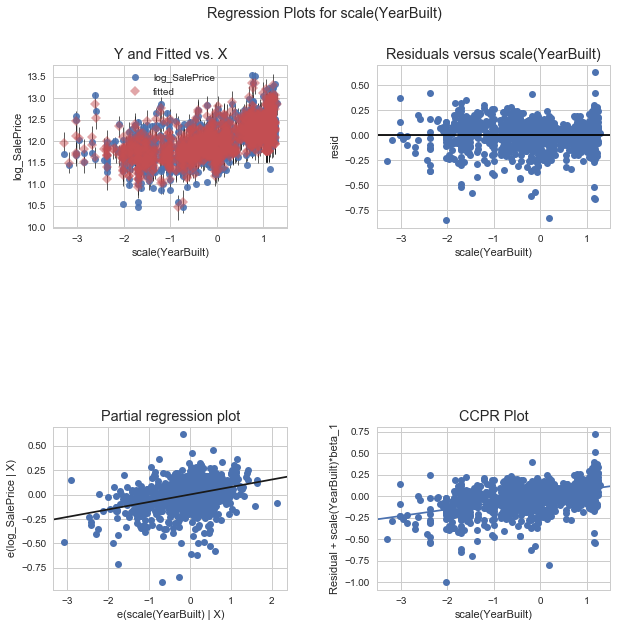

In [44]:
LinearRegExo(df_train, makeScaleFormula("log_SalePrice", scale_list, non_scale_list, True), "scale(YearBuilt)")

In [240]:
# df_train = pd.read_csv("../data/train_no_missing.csv")

# numeric_list = []
# categoric_list = []

# for c in df_train.columns:
#     if df_train[c].dtype == "int64" or df_train[c].dtype == "float64":
#         numeric_list.append(c)
#     else:
#         categoric_list.append(c)
        
# numeric_list.remove("SalePrice")
# numeric_list.remove("Id")

# result = LinearRegR(df_train, makeFormula("SalePrice", numeric_list, categoric_list))